In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/BankCustomer.csv')
df.head()

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited
0,Kan Jian,Female,40,Beijing,9,2,0,1,516,6360.66,0.0000,0
1,Xue Baochai,Male,69,Beijing,6,2,0,1,682,28605.00,0.0000,0
2,Mao Xi,Female,32,Beijing,9,1,1,1,803,10378.09,236311.0932,1
3,Zheng Nengliang,Female,37,Tianjin,0,2,1,1,778,25564.01,129909.8079,1
4,Zhi Fen,Male,55,Tianjin,4,3,1,0,547,3235.61,136976.1948,1


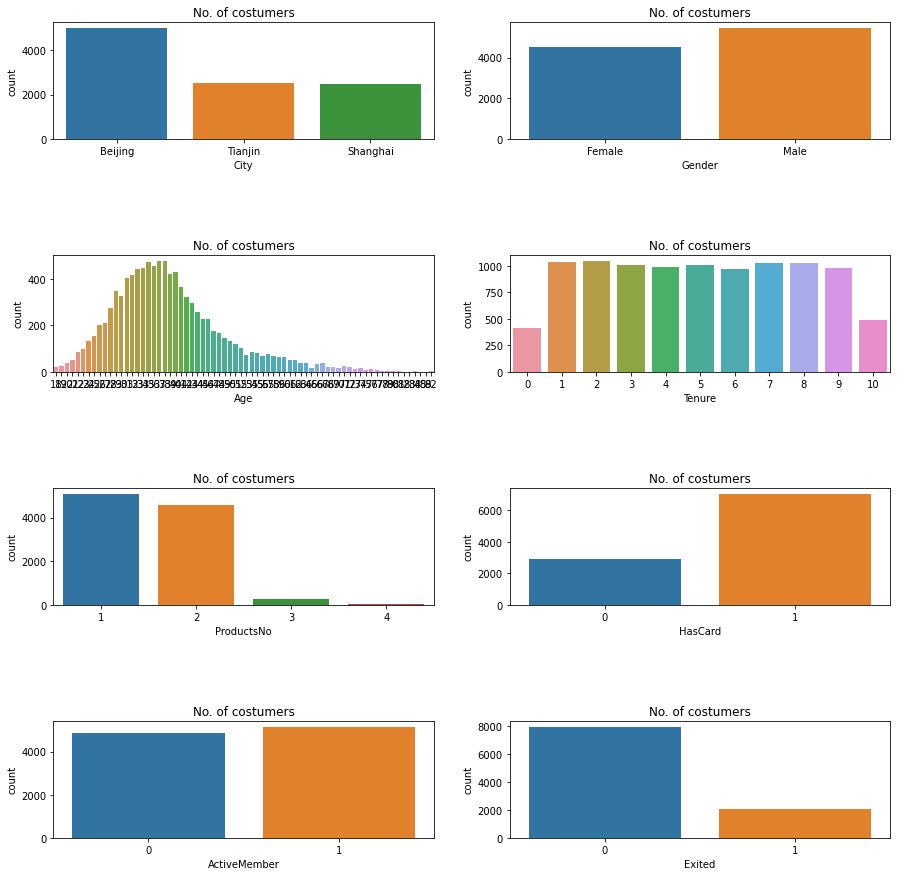

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ['City','Gender','Age','Tenure','ProductsNo','HasCard','ActiveMember','Exited']
fig = plt.subplots(figsize=(15,15))
for i,j in enumerate(features):       # enumerate() 為列舉法，各別給予編號
    plt.subplot(4,2,i+1)              #將大圖切割成四列兩行
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x = j,data = df)   
    plt.title("No. of costumers")

In [3]:
#將性別用0、1去做分類
df['Gender'].replace("Female",0,inplace = True)
df['Gender'].replace("Male",1,inplace = True)
print('Gender unique values',df['Gender'].unique())
#將多元類別轉成多個二元類別的dummy variable，然後當作欄位放入data set中
df_city = pd.get_dummies(df['City'],prefix = 'City')    # prefix: String to append DataFrame column name
df = [df,df_city]
df = pd.concat(df,axis=1)

Gender unique values [0 1]


In [4]:
df.head()

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited,City_Beijing,City_Shanghai,City_Tianjin
0,Kan Jian,0,40,Beijing,9,2,0,1,516,6360.66,0.0000,0,1,0,0
1,Xue Baochai,1,69,Beijing,6,2,0,1,682,28605.00,0.0000,0,1,0,0
2,Mao Xi,0,32,Beijing,9,1,1,1,803,10378.09,236311.0932,1,1,0,0
3,Zheng Nengliang,0,37,Tianjin,0,2,1,1,778,25564.01,129909.8079,1,0,0,1
4,Zhi Fen,1,55,Tianjin,4,3,1,0,547,3235.61,136976.1948,1,0,0,1


In [5]:
y = df['Exited']
X = df.drop(['Name','Exited','City'],axis = 1)
X.head()

,Gender,Age,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,City_Beijing,City_Shanghai,City_Tianjin
0,0,40,9,2,0,1,516,6360.66,0.0000,1,0,0
1,1,69,6,2,0,1,682,28605.00,0.0000,1,0,0
2,0,32,9,1,1,1,803,10378.09,236311.0932,1,0,0
3,0,37,0,2,1,1,778,25564.01,129909.8079,0,0,1
4,1,55,4,3,1,0,547,3235.61,136976.1948,0,0,1


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
history = lr.fit(X_train,y_train)
print("邏輯回歸預測準確率 {:.2f}%".format(lr.score(X_test,y_test)*100 ))

邏輯回歸預測準確率 78.35%


In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()
ann.add(Dense(units=12,input_dim = 12,activation = 'relu'))     #增加輸入層
ann.add(Dense(units=24,activation = 'relu'))                    #增加隱藏層
ann.add(Dense(units=1,activation = 'sigmoid'))                 #增加輸出層
ann.summary()                                  #顯示網路模型

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


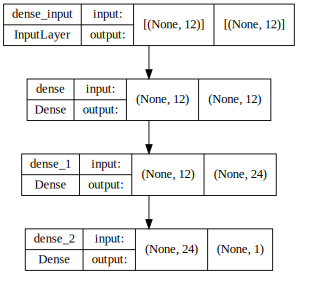

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(ann,show_shapes=True,show_layer_names=True,dpi=65).create(prog='dot',format='svg'))

In [10]:
ann.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['acc'])

In [11]:
history = ann.fit(X_train,y_train,epochs=30,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/30
125/125 [==============================] - 7s 15ms/step - loss: 1349.6019 - acc: 0.7080 - val_loss: 72.1790 - val_acc: 0.7310
Epoch 2/30
125/125 [==============================] - 1s 5ms/step - loss: 41.8023 - acc: 0.6961 - val_loss: 53.0176 - val_acc: 0.7915
Epoch 3/30
125/125 [==============================] - 1s 6ms/step - loss: 41.4373 - acc: 0.6981 - val_loss: 52.7318 - val_acc: 0.7910
Epoch 4/30
125/125 [==============================] - 1s 5ms/step - loss: 45.0831 - acc: 0.6892 - val_loss: 48.4759 - val_acc: 0.4740
Epoch 5/30
125/125 [==============================] - 1s 5ms/step - loss: 23.8280 - acc: 0.6869 - val_loss: 16.4904 - val_acc: 0.4740
Epoch 6/30
125/125 [==============================] - 1s 5ms/step - loss: 37.8389 - acc: 0.6833 - val_loss: 29.2937 - val_acc: 0.5695
Epoch 7/30
125/125 [==============================] - 1s 4ms/step - loss: 28.2881 - acc: 0.6780 - val_loss: 26.7915 - val_acc: 0.7915
Epoch 8/30
125/125 [==============================] - 1s 6m

**顯示訓練過程中的學習曲線**

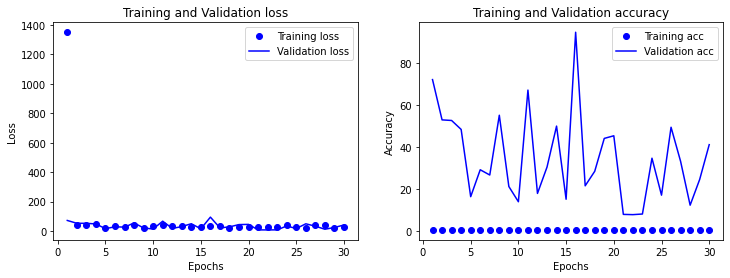

In [12]:
def show_history(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1,len(loss) + 1)
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)    #繪製圖中(共第一列第二欄)的第一張圖
  plt.plot(epochs,loss,'bo',label = 'Training loss')
  plt.plot(epochs,val_loss,'b',label = 'Validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  acc = history.history['acc']
  val_acc = history.history['val_acc']
  plt.subplot(1,2,2)
  plt.plot(epochs,acc,'bo',label = 'Training acc')
  plt.plot(epochs,val_loss,'b',label = 'Validation acc')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()
show_history(history)

In [13]:
from sklearn.metrics import classification_report
y_pred = ann.predict(X_test,batch_size=10)        #預測測試集的標籤
y_pred = np.round(y_pred)                 #四捨五入，將分類機率轉成0/1整數值
y_test = y_test.values                  #把pandas series型態利用.values轉成numpy array
y_test = y_test.reshape(len(y_test),1)          #轉成和y_pred相同形狀
print(classification_report(y_test,y_pred,labels=[0,1]))  #呼叫分類報告

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1583
           1       0.43      0.01      0.01       417

    accuracy                           0.79      2000
   macro avg       0.61      0.50      0.45      2000
weighted avg       0.72      0.79      0.70      2000



annot:註釋，在每格heatmap中寫入數據

cmap:熱力圖的顏色

fmt:格式设置，决定annot注释的数字格式，小数点后几位等

cbar : 是否画一个颜色条

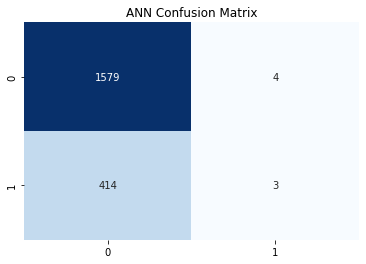

In [14]:
from sklearn.metrics import confusion_matrix
conf_ma = confusion_matrix(y_test,y_pred)
plt.title('ANN Confusion Matrix')
sns.heatmap(conf_ma,annot=True,cmap='Blues',fmt='d',cbar=False)  
plt.show()

#資料不太準，應該先使用Feature scaling
利用標準化方式!
以下有兩個寫法，皆可使用

In [15]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_test -= mean
X_test /= std
print(X_train)
print(X_test)

        Gender       Age    Tenure  ProductsNo   HasCard  ActiveMember  \
7389 -1.085042  0.682115 -1.037326   -0.909864  0.645080      0.975732   
9275  0.921508 -0.086885 -0.000648    0.808481  0.645080      0.975732   
2995 -1.085042  0.009240  0.690471    0.808481 -1.550002     -1.024744   
5316  0.921508 -0.183010 -1.382885   -0.909864  0.645080     -1.024744   
356   0.921508 -0.183010  1.381590   -0.909864  0.645080      0.975732   
...        ...       ...       ...         ...       ...           ...   
9225 -1.085042 -1.432635 -1.382885    0.808481  0.645080      0.975732   
4859  0.921508 -0.279135 -0.691767    0.808481  0.645080      0.975732   
3264 -1.085042  2.892990  1.381590   -0.909864 -1.550002      0.975732   
9845 -1.085042 -1.048135  1.381590    0.808481  0.645080     -1.024744   
2732  0.921508 -1.240385  0.690471    0.808481  0.645080      0.975732   

        Credit  AccountBal    Salary  City_Beijing  City_Shanghai  \
7389 -1.518310    1.131386  1.395816      

In [16]:
#法二，直接帶入套件
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
history = lr.fit(X_train,y_train)
print('Logistic Regression準確率 {:.2f}%'.format(lr.score(X_test,y_test)*100))

Logistic Regression準確率 80.50%


#重新訓練單層的神經網路，準確度提升了!!

In [18]:
history = ann.fit(X_train,y_train,epochs=30,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/30
125/125 [==============================] - 2s 9ms/step - loss: 0.5177 - acc: 0.7740 - val_loss: 0.4661 - val_acc: 0.8020
Epoch 2/30
125/125 [==============================] - 1s 7ms/step - loss: 0.4511 - acc: 0.8083 - val_loss: 0.4547 - val_acc: 0.8055
Epoch 3/30
125/125 [==============================] - 1s 6ms/step - loss: 0.4417 - acc: 0.8105 - val_loss: 0.4477 - val_acc: 0.8090
Epoch 4/30
125/125 [==============================] - 1s 8ms/step - loss: 0.4350 - acc: 0.8140 - val_loss: 0.4416 - val_acc: 0.8085
Epoch 5/30
125/125 [==============================] - 1s 9ms/step - loss: 0.4295 - acc: 0.8158 - val_loss: 0.4362 - val_acc: 0.8090
Epoch 6/30
125/125 [==============================] - 1s 8ms/step - loss: 0.4238 - acc: 0.8177 - val_loss: 0.4306 - val_acc: 0.8150
Epoch 7/30
125/125 [==============================] - 1s 8ms/step - loss: 0.4184 - acc: 0.8209 - val_loss: 0.4251 - val_acc: 0.8160
Epoch 8/30
125/125 [==============================] - 1s 7ms/step - loss: 0.

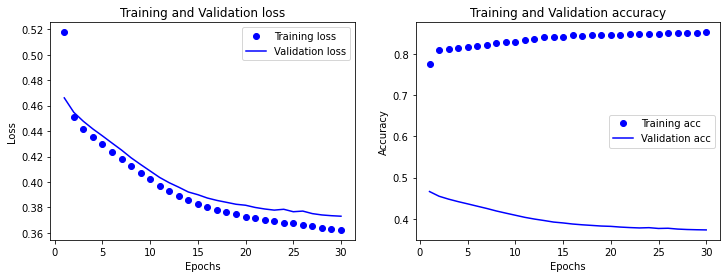

In [19]:
show_history(history)       #曲線變得較平滑

#precision、recall、F1 score大幅提高

In [21]:
y_pred = ann.predict(X_test,batch_size=10)        #預測測試集的標籤
y_pred = np.round(y_pred)                 #四捨五入，將分類機率轉成0/1整數值             #把pandas series型態利用.values轉成numpy array
y_test = y_test.reshape(len(y_test),1)          #轉成和y_pred相同形狀
print(classification_report(y_test,y_pred,labels=[0,1]))  #呼叫分類報告

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1583
           1       0.75      0.45      0.56       417

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.84      0.85      0.84      2000



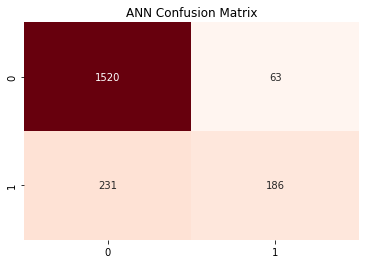

In [22]:
from sklearn.metrics import confusion_matrix
conf_ma = confusion_matrix(y_test,y_pred)
plt.title('ANN Confusion Matrix')
sns.heatmap(conf_ma,annot=True,cmap='Reds',fmt='d',cbar=False)  
plt.show()